In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 1: Load the data 載入資料</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Dataset Information 資料集資訊</div>

### Metadata
- Name 資料集名稱: DAIGT V2 Train Dataset
- Link 資料集連結: [DAIGT V2 Train Dataset](https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset)
- Sample Size 樣本數: 44868

### Columns
- `text` : The text of the essay 文章內容
- `label` : The label of the essay 1 for AI generated, 0 for human written 文章標籤，1 代表 AI 生成，0 代表人類撰寫
- `prompt_name` : The original persuade prompt 原始說服指示名稱
- `source` : The source dataset 文章來源資料集
- `RDizzl3_seven` : For filtering purposes 用於篩選目的

### Description (From Kaggle)

New release of DAIGT train dataset! Improvement:

- new models: Cohere Command, Google Palm, GPT4 (from Radek!)
- new prompts, including source texts from the original essays!
- mapping of essay text to original prompt from persuade corpus
- filtering by the famous "RDizzl3_seven"


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the data from CSV file 載入 CSV 檔案</div>

In [47]:
df = pd.read_csv('../data/DAIGT V2 Train Dataset.csv')
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,"Phones\r\n\r\nModern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving. They are some really bad consequences when stuff happens when it comes to a phone. Some certain areas in the United States ban phones from class rooms just because of it.\r\n\r\nWhen people have phones, they know about certain apps that they have .Apps like Facebook Twitter Instagram and Snapchat. So like if a friend moves away and you want to be in contact you can still be in contact by posting videos or text messages. People always have different ways how to communicate with a phone. Phones have changed due to our generation.\r\n\r\nDriving is one of the way how to get around. People always be on their phones while doing it. Which can cause serious Problems. That's why there's a thing that's called no texting while driving. That's a really important thing to remember. Some people still do it because they think It's stupid. No matter what they do they still have to obey it because that's the only way how did he save.\r\n\r\nSometimes on the news there is either an accident or a suicide. It might involve someone not looking where they're going or tweet that someone sent. It either injury or death. If a mysterious number says I'm going to kill you and they know where you live but you don't know the person's contact ,It makes you puzzled and make you start to freak out. Which can end up really badly.\r\n\r\nPhones are fine to use and it's also the best way to come over help. If you go through a problem and you can't find help you ,always have a phone there with you. Even though phones are used almost every day as long as you're safe it would come into use if you get into trouble. Make sure you do not be like this phone while you're in the middle of driving. The news always updated when people do something stupid around that involves their phones. The safest way is the best way to stay safe.",0,Phones and driving,persuade_corpus,False
1,"This essay will explain if drivers should or should not be able to use electronic devices while operating a vehicle. Using a phone while driving can cause very bad wrecks, because they are putting themselves and other people at risk. People should not be able to use cell phones while operating a vehicle is because bad wrecks, putting others' lives in danger, and may cause death.\r\n\r\nFirst of all, wrecks can be caused by looking down at your phone while driving. Most importantly, you should always keep your eyes directly on the road when behind the wheel of a car. On that note, you will have an outrageously car payment just because you were looking down at your phone. Moreover, if you the reason the accident happened the person that was operating the other car can sue you for lots of money, and you will have to pay it. Therefore, if you don't pay whatever the person charges you consequences will be served and that's behind bars.\r\n\r\nAnother reason why we should not be able to use cell phones while operating an automobile is that you are putting other people's lives in danger. Thus, looking down at your cell phone you can get someone else hurt for the uncommunicative act you committed. As well as unconsciousness, injuries, or being in a hospital.\r\n\r\nThe main key to not texting and driving while behind the wheel of a car. Mainly, it can cause tragic, terrifying, and horrific things to you and to others and that's death. That's the most important thing to not using electronic devices while operating a vehicle. With the intension, of you not keeping your eyes and staying focus on the road you can easily turn off the road or hit another victim. Possibly another humankind could go away of all flesh because of your stupidity.\r\n\r\nMust be remembered, always stay focus on the road so you can get to your destination

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Data Exploration 資料探索</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


The dataset contains 44868 rows and 5 columns. There are no missing values in the dataset.

該資料集包含 44868 行和 5 列。資料集中沒有缺失值。

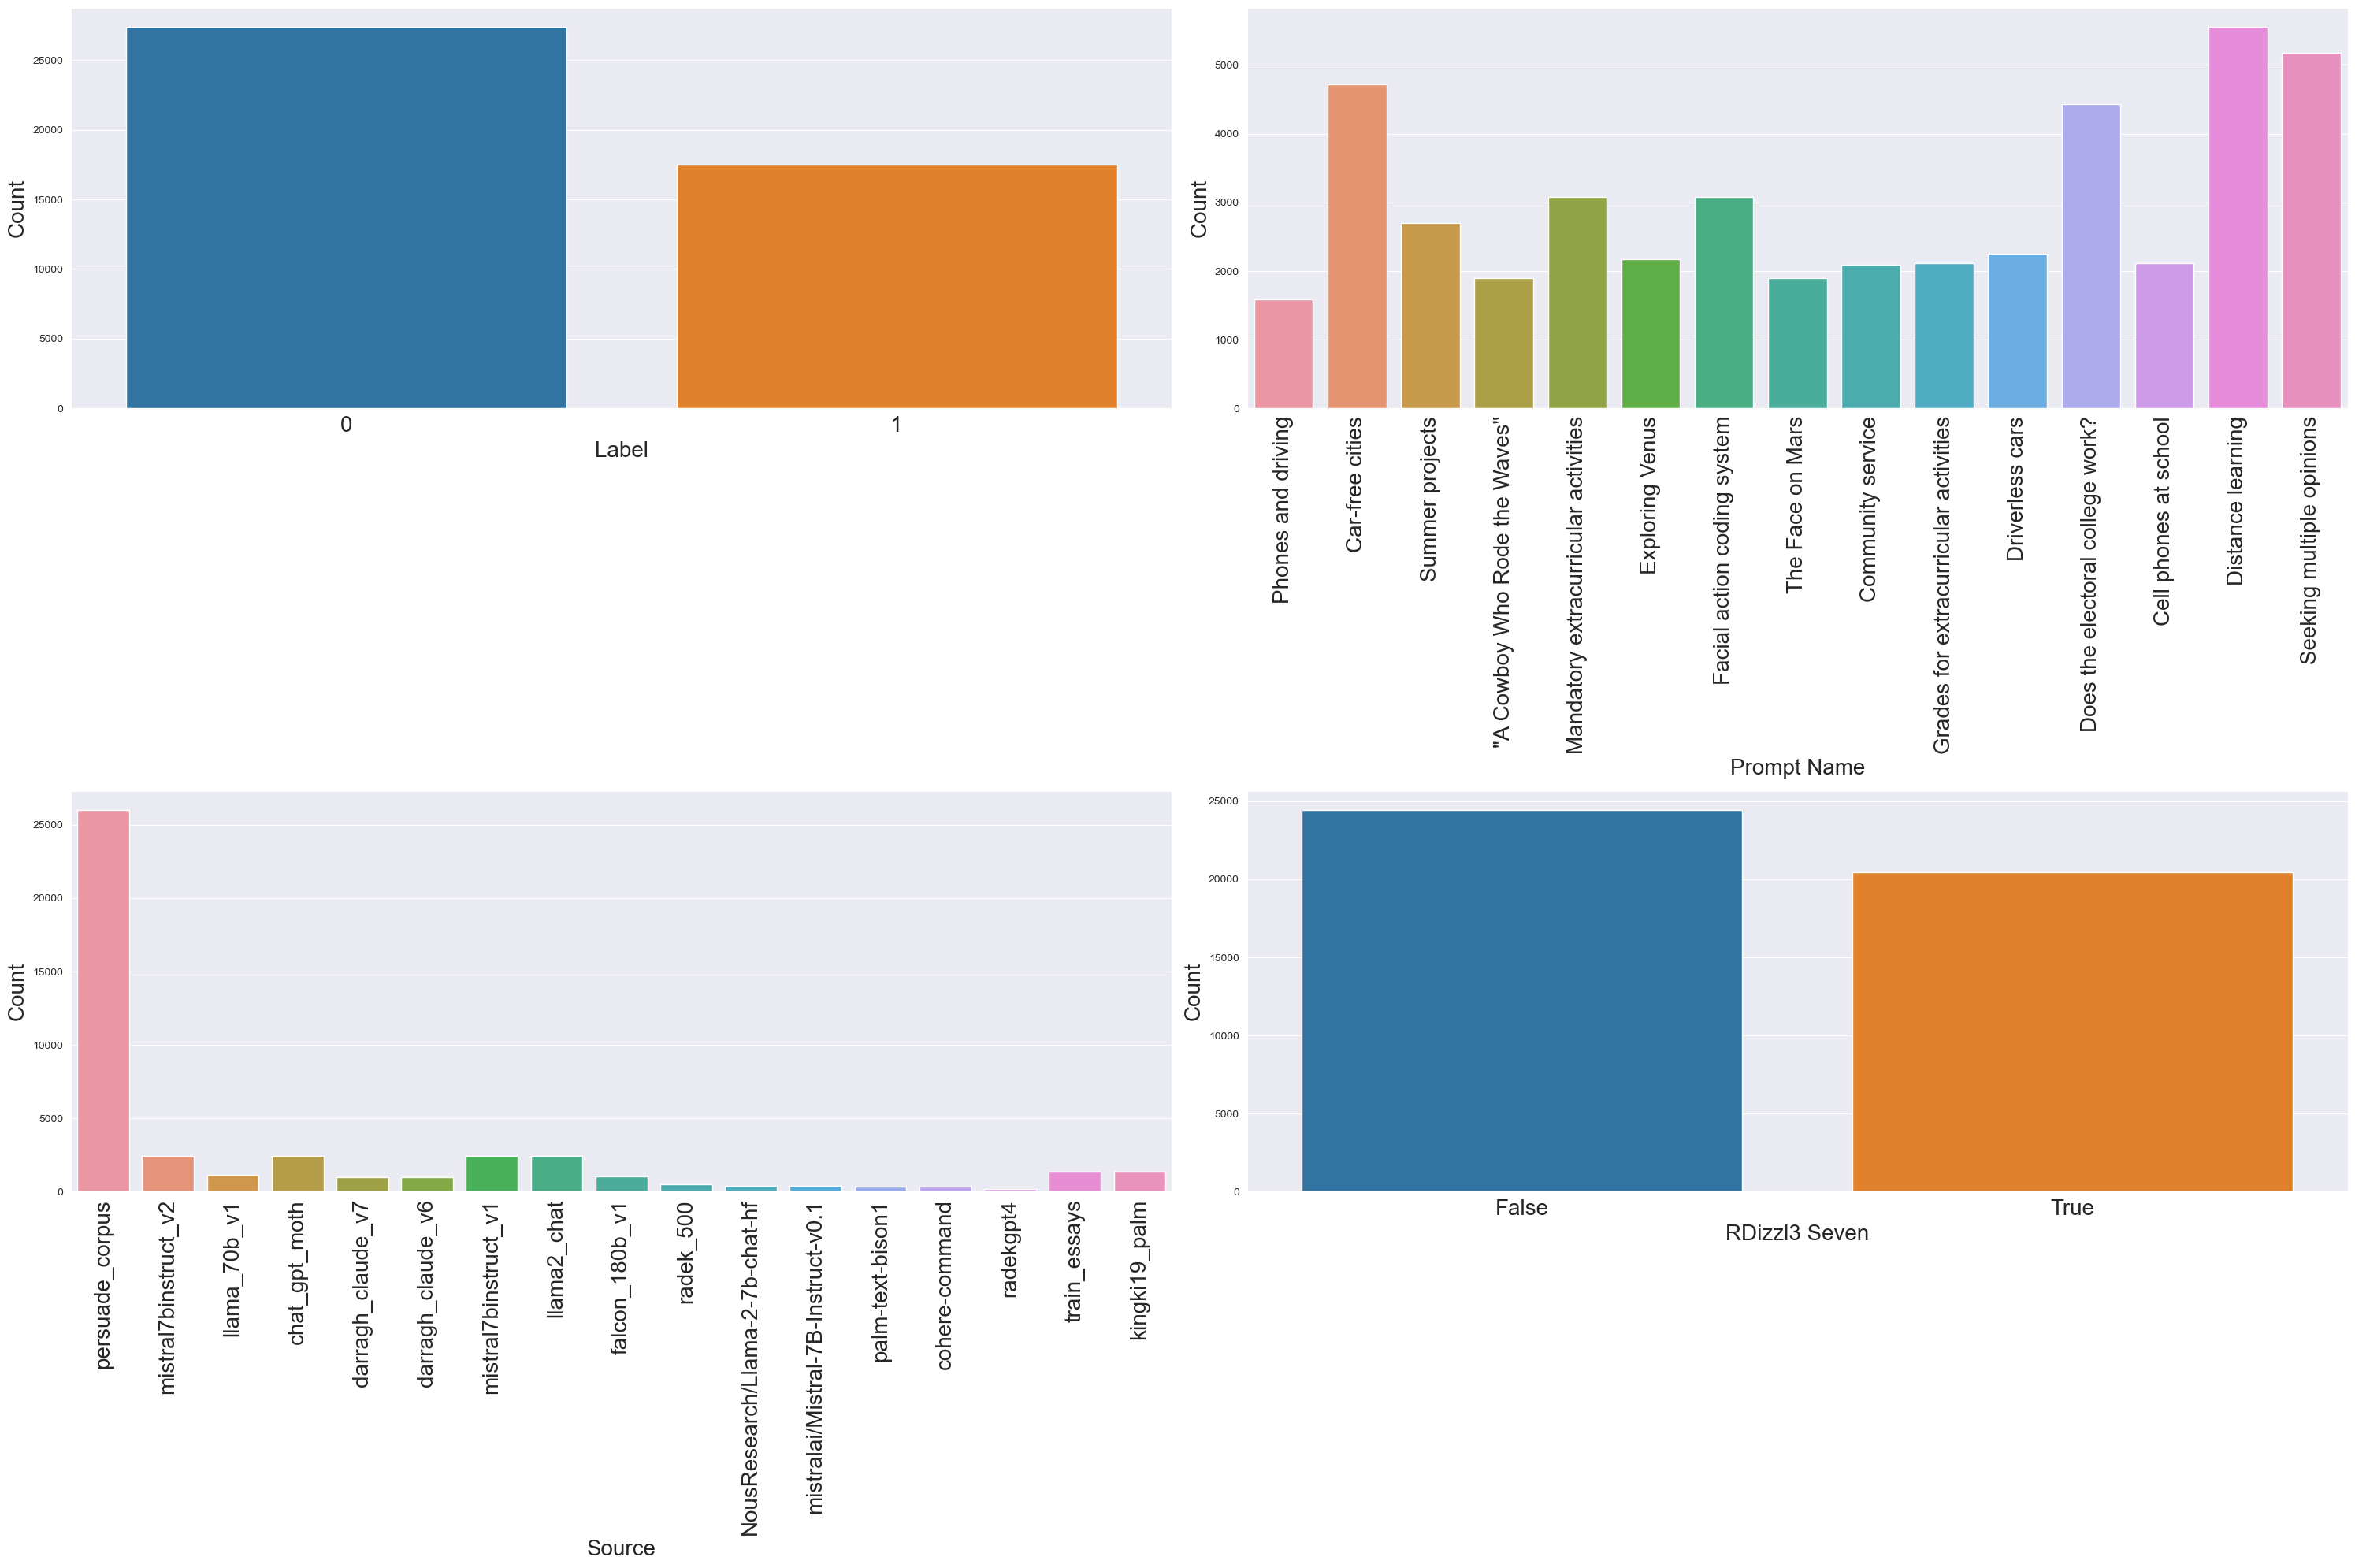

In [6]:
# Check for unique values in each column
fig, ax = plt.subplots(2, 2, figsize=(30, 20))

sns.countplot(x='label', data=df, ax=ax[0, 0])
ax[0, 0].tick_params(axis='x', labelsize=20)
ax[0, 0].set_xlabel('Label', fontsize=20)
ax[0, 0].set_ylabel('Count', fontsize=20)

sns.countplot(x='prompt_name', data=df, ax=ax[0, 1])
ax[0, 1].tick_params(axis='x', rotation=90, labelsize=20)
ax[0, 1].set_xlabel('Prompt Name', fontsize=20)
ax[0, 1].set_ylabel('Count', fontsize=20)

sns.countplot(x='source', data=df, ax=ax[1, 0])
ax[1, 0].tick_params(axis='x', rotation=90, labelsize=20)
ax[1, 0].set_xlabel('Source', fontsize=20)
ax[1, 0].set_ylabel('Count', fontsize=20)

sns.countplot(x='RDizzl3_seven', data=df, ax=ax[1, 1])
ax[1, 1].tick_params(axis='x', labelsize=20)
ax[1, 1].set_xlabel('RDizzl3 Seven', fontsize=20)
ax[1, 1].set_ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

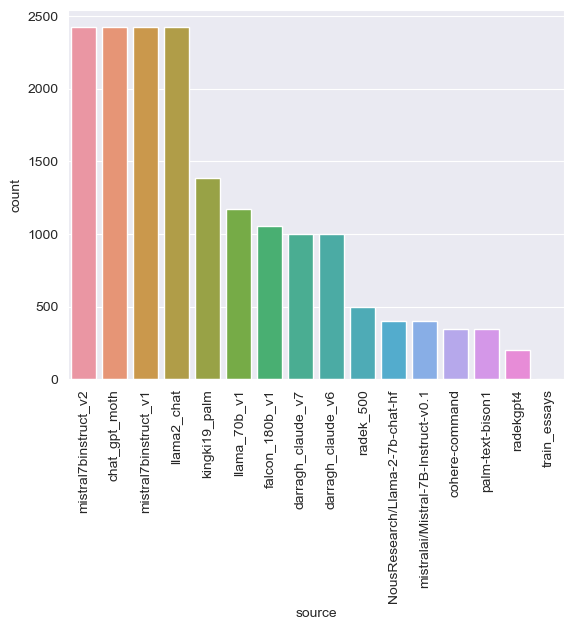

In [7]:
# Check distribution of the Source column for AI generated
subset = df[df['label'] == 1]
sns.countplot(x='source', data=subset, order=subset['source'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- mistral7b/instruct_v2: 出現最多，約2500次。
- chat_gpt_moth: 與 mistral7b/instruct_v2 相同，約2500次。
- mistral7b/instruct_v1: 也與 mistral7b/instruct_v2 相同，約2500次。
- llama2_chat: 稍微少一些，約2000次。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 2: Data Preprocessing 資料前處理</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Split the data into training and testing 分割資料集為訓練集和測試集</div>

In [48]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

train_df.shape, val_df.shape

((40381, 5), (4487, 5))

我們可以看到訓練集有 40381 行，驗證集有 4487 行。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Check split distribution 檢查分割分佈</div>

In [9]:
train_df['label'].value_counts(normalize=True)

0    0.611055
1    0.388945
Name: label, dtype: float64

In [10]:
val_df['label'].value_counts(normalize=True)

0    0.600847
1    0.399153
Name: label, dtype: float64

可以看到訓練集和驗證集中 AI 生成和人類撰寫的文章比例相似。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Create Hugging Face Datasets 創建 Hugging Face 資料集</div>

In [11]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

In [12]:
train_dataset

Dataset({
    features: ['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', '__index_level_0__'],
    num_rows: 40381
})

In [13]:
val_dataset

Dataset({
    features: ['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', '__index_level_0__'],
    num_rows: 4487
})

In [14]:
train_dataset.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'prompt_name': Value(dtype='string', id=None),
 'source': Value(dtype='string', id=None),
 'RDizzl3_seven': Value(dtype='bool', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

In [15]:
val_dataset.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'prompt_name': Value(dtype='string', id=None),
 'source': Value(dtype='string', id=None),
 'RDizzl3_seven': Value(dtype='bool', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Save the datasets 儲存資料集</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Save the datasets to disk 儲存資料集到磁碟</div>

In [16]:
train_dataset.save_to_disk('data/train_dataset')
val_dataset.save_to_disk('data/val_dataset')

Saving the dataset (0/1 shards):   0%|          | 0/40381 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4487 [00:00<?, ? examples/s]

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the datasets from disk 從磁碟載入資料集</div>

In [2]:
train_dataset = Dataset.load_from_disk('data/train_dataset')
val_dataset = Dataset.load_from_disk('data/val_dataset')

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 4: Load the transformer model 載入 Transformer 模型</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Select the model 選擇模型</div>

### Roberta

在這個 notebook 中，我們將使用 Hugging Face Roberta 模型進行文本分類任務。

- 模型名稱: `roberta-base`
- 模型類型: Transformer
- 模型架構: RoBERTa (Robustly optimized BERT approach)

In [11]:
model_name = 'roberta-base'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 5: Encode the text data 編碼文本數據</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Use the tokenizer to encode the text data 使用 tokenizer 編碼文本數據</div>

In [12]:
def encode(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

# Encode the text data
train_dataset = train_dataset.map(encode, batched=True)
val_dataset = val_dataset.map(encode, batched=True)

# Set the format to PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/40381 [00:00<?, ? examples/s]

Map:   0%|          | 0/4487 [00:00<?, ? examples/s]

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 6: Set up the training parameters and train the model 設置訓練參數並訓練模型</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Set up device 設置設備</div>

In [13]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [14]:
device

device(type='cuda')

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Set up the training parameters 設置訓練參數</div>

In [15]:
# Set up the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=24,
    per_device_eval_batch_size=24,
    warmup_steps=500,
    weight_decay=0.1,
    learning_rate=2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch'
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Start training 開始訓練</div>

In [16]:
# 禁用 WandB
os.environ["WANDB_DISABLED"] = "true"

# Start training
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.000200,0.054144
2,0.000400,0.070555
3,0.000100,0.049024


TrainOutput(global_step=5049, training_loss=0.027445350877585484, metrics={'train_runtime': 2978.0814, 'train_samples_per_second': 40.678, 'train_steps_per_second': 1.695, 'total_flos': 3.187406257947648e+16, 'train_loss': 0.027445350877585484, 'epoch': 3.0})

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 6: Evaluate the model 評估模型</div>

In [17]:
# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

Evaluation results: {'eval_loss': 0.04902404174208641, 'eval_runtime': 37.0223, 'eval_samples_per_second': 121.197, 'eval_steps_per_second': 5.051, 'epoch': 3.0}


In [18]:
eval_results

{'eval_loss': 0.04902404174208641,
 'eval_runtime': 37.0223,
 'eval_samples_per_second': 121.197,
 'eval_steps_per_second': 5.051,
 'epoch': 3.0}

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 7: Show TensorBoard logs 顯示 TensorBoard 日誌</div>

In [ ]:
!tensorboard --logdir ./logs

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 8: Save the model 儲存模型</div>

In [24]:
model.save_pretrained('models/roberta-base-daigt')

In [25]:
tokenizer.save_pretrained('models/roberta-base-daigt')

('models/roberta-base-daigt\\tokenizer_config.json',
 'models/roberta-base-daigt\\special_tokens_map.json',
 'models/roberta-base-daigt\\vocab.json',
 'models/roberta-base-daigt\\merges.txt',
 'models/roberta-base-daigt\\added_tokens.json',
 'models/roberta-base-daigt\\tokenizer.json')

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 9: Load the model and test 載入模型並測試</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the model and tokenizer 載入模型和 tokenizer</div>

In [26]:
model = AutoModelForSequenceClassification.from_pretrained('models/roberta-base-daigt')
tokenizer = AutoTokenizer.from_pretrained('models/roberta-base-daigt')

In [28]:
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [29]:
tokenizer

RobertaTokenizerFast(name_or_path='models/roberta-base-daigt', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Test the model 測試模型</div>

In [32]:
# Set up the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=24,
    per_device_eval_batch_size=24,
    warmup_steps=500,
    weight_decay=0.1,
    learning_rate=2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch'
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [33]:
# Predict on the validation dataset
predictions = trainer.predict(val_dataset)

Validation Accuracy: 0.9933


In [37]:
# Get the predicted labels and the true labels
labels = predictions.label_ids
preds = predictions.predictions.argmax(-1)

# Calculate the confusion matrix
cm = confusion_matrix(labels, preds)

cm

array([[2672,   24],
       [   6, 1785]], dtype=int64)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Plot the confusion matrix 繪製混淆矩陣</div>

<Figure size 1000x700 with 0 Axes>

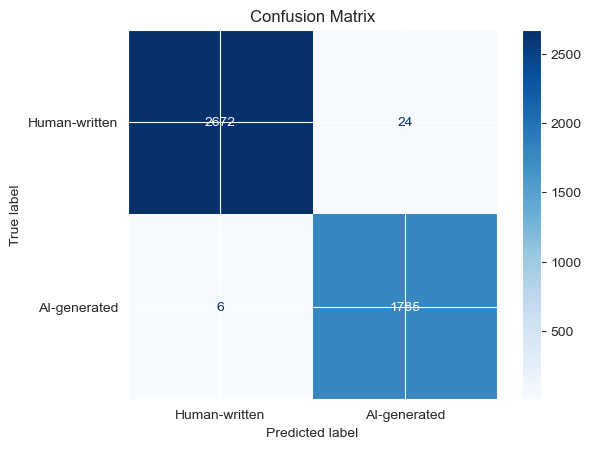

In [40]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human-written', 'AI-generated'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the 4 scores 計算 4 個分數</div>

In [43]:
# Calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(labels, preds)
precision = precision_score(labels, preds)
recall = recall_score(labels, preds)
f1 = f1_score(labels, preds)

In [44]:
# Show the scores
pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

,Metric,Score
0,Accuracy,0.993314
1,Precision,0.986733
2,Recall,0.996650
3,F1 Score,0.991667


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 10: Show the validation texts error 顯示驗證集錯誤文本</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Get the validation texts 獲取驗證集文本</div>

In [49]:
# Get the validation texts
val_texts = val_df['text'].tolist()
errors = [(val_texts[i], labels[i], preds[i]) for i in range(len(labels)) if labels[i] != preds[i]]

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Show the validation texts errors 顯示驗證集文本錯誤</div>

In [52]:
error_df = pd.DataFrame(errors, columns=['Text', 'True Label', 'Predicted Label'])
error_df

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              What makes a mistake something someone will never do again? It is usually the outcome of the mistake. It is what went wrong, but the problem with texting and driving is that it is not always something that goes wrong, but when it does go astray, it is usually life-threatening. How are people supposed to learn from an outcome that has never happened to them? The first step of learning from a mistake is to own the mistake, but it is hard to own a mistake when it does not feel like one. Well, the easiest way is to learn from someone else's mistake.\r\n\r\nLiz Marks was a popular girl, a model even, but that all stopped when she used her phone while driving. She read a one-word text before she even had time to respond; she had crashed into a truck. Liz had to be airlifted from the accident to the University of Baltimore Shock Trauma Center, and the first responders did not even think she would make it. She ended up spending a month in the ICU to have various surgeries. After that, she spent another three months at the Kennedy Krieger Institute relearning reading, writing, walking, talking, swallowing, and chewing. She survived, but she has severe facial trauma. She is blind in one eye, cannot smell, has lost some of her hearing, cannot even make her tears, and cannot sleep without medication.\r\n\r\nAlexandra Mansonet was found guilty of vehicular manslaughter after she killed someo

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Show the validation texts AI generated but predicted as human-written 顯示驗證集文本 AI 生成但預測為人類撰寫</div>

In [53]:
# Show the validation texts where the true label is AI generated but predicted as human-written
error_df[(error_df['True Label'] == 1) & (error_df['Predicted Label'] == 0)]

,Text,True Label,Predicted Label
1,"My first opinion,\r\n\r\nwould be that to be a good person,\r\n\r\nis you have to be your self no matter what is going to happen. For example a good behavior star at home because your parents have the responsibility to educate. Also some people said the students are very bad for other students, like they are bad influence.\r\n\r\nMy second, reason would be the your own problems can affect, your career. For example your grades at school if you are a good person with other people to be a good citizen just be you because people the just talk never do something good. But sometimes teen don't deserve what they have for example school, job, people the they love them.\r\n\r\nAfter that well, if you work that is a good idea because you can focus, and two things but if you are weak that will be a terrible decision. So a good behavior is excellent, because you always can find friends, and maybe a girlfriend but den pent of you.\r\n\r\nIn conclusion, if you are a good behavior you will be a good person, and the future, and a good guide for you children. Also if you are a good students,you will be have credit for college but you have to be a good behavior. So the mean, that you responsibility is work very hard to complete your goals. And help other people, who need help because the would make you a good behavior.",1,0
2,"Last week, I had a math test on my first period. I prepared well for the test, but on that day, I woke up late, and I realized I got late for my school. I also have missed my school bus; therefore, I had to walk the whole way to my school. I was tired and tensed. As a result, I couldn't do well in that test, but if I was taking online class, I could take the test from home and be able to not get into all this trouble. Online classes can save us from getting into all this kind of problems and save our time also. Although some say students would not benefit from being able to attend classes from home because sometimes, students might not understand their lecture or work on online classes, and as a result, they would not be able to do well in that class, actually students would benefit from being able to attend online classes from home because sometimes, students don't want to go to school because of sickness or being not at home, so they can stay home and take classes from wherever they are at that time and by taking online classes, high school students can save a lot of time and can work for more hours or do some other courses or activities.\r\n\r\nThose who believe students would not benefit from being able to attend classes from home have their reasons.\r\n\r\nThey say sometimes students might not understand their lecture or work on online classes, and as a result, they would not be able to do well in that class. For example, if they get a project or assignment, some students may have trouble in understanding how to do/complete that assignment or sometimes, they might not understand a topic from a lecture in online class.\r\n\r\nHowever, students would benefit from being able to attend online classes from home because sometimes, students don't want to go to school because of sickness or being not at home, so they can stay home and take classes from wherever they are at that time. For example, if I get sick, I don't need to miss school. I can stay at home and take my classes from home. Again, if I'm not at home or may be I'm at my relative's place or my friend's place, I'll be still able to attend those classes.\r\n\r\nAlso, students would benefit from being able to attend online classes from home because by taking online classes, high school students can save",1,0
13,"It is often said that you can not make a child, teenager, or adult do what they do not want to do. Imagine starting a new school year; students are ready to learn, to take classes they will really enjoy, and to see their friends. It comes time to pick up their schedule and they see that there is some classes that they rea

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Show the validation texts human-written but predicted as AI generated 顯示驗證集文本人類撰寫但預測為 AI 生成</div>

In [54]:
# Show the validation texts where the true label is human-written but predicted as AI generated
error_df[(error_df['True Label'] == 0) & (error_df['Predicted Label'] == 1)]

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              What makes a mistake something someone will never do again? It is usually the outcome of the mistake. It is what went wrong, but the problem with texting and driving is that it is not always something that goes wrong, but when it does go astray, it is usually life-threatening. How are people supposed to learn from an outcome that has never happened to them? The first step of learning from a mistake is to own the mistake, but it is hard to own a mistake when it does not feel like one. Well, the easiest way is to learn from someone else's mistake.\r\n\r\nLiz Marks was a popular girl, a model even, but that all stopped when she used her phone while driving. She read a one-word text before she even had time to respond; she had crashed into a truck. Liz had to be airlifted from the accident to the University of Baltimore Shock Trauma Center, and the first responders did not even think she would make it. She ended up spending a month in the ICU to have various surgeries. After that, she spent another three months at the Kennedy Krieger Institute relearning reading, writing, walking, talking, swallowing, and chewing. She survived, but she has severe facial trauma. She is blind in one eye, cannot smell, has lost some of her hearing, cannot even make her tears, and cannot sleep without medication.\r\n\r\nAlexandra Mansonet was found guilty of vehicular manslaughter after she killed someo

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Save the error DataFrame for future analysis 儲存錯誤 DataFrame 以供未來分析</div>

In [55]:
error_df.to_csv('data/error_df.csv', index=False)